In [12]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import legacy as legacy_optimizers

In [13]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [14]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        './data/train', 
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [15]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        './data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [16]:
# create model structure
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

model.compile(loss='categorical_crossentropy', optimizer=legacy_optimizers.Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
emotion_model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=80,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

<ipython-input-16-2a5796c9deb8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = model.fit_generator(


Epoch 1/80
441/441 [==============================] - ETA: 0s - loss: 1.5386 - accuracy: 0.3864

441/441 [==============================] - 115s 260ms/step - loss: 1.5386 - accuracy: 0.3864 - val_loss: 1.4556 - val_accuracy: 0.4337
Epoch 2/80
441/441 [==============================] - 94s 212ms/step - loss: 1.4411 - accuracy: 0.4341
Epoch 3/80
441/441 [==============================] - 93s 211ms/step - loss: 1.3733 - accuracy: 0.4683
Epoch 4/80
441/441 [==============================] - 93s 212ms/step - loss: 1.3174 - accuracy: 0.4875
Epoch 5/80
441/441 [==============================] - 95s 216ms/step - loss: 1.2683 - accuracy: 0.5086
Epoch 6/80
441/441 [==============================] - 96s 218ms/step - loss: 1.2301 - accuracy: 0.5286
Epoch 7/80
441/441 [==============================] - 93s 212ms/step - loss: 1.1926 - accuracy: 0.5408
Epoch 8/80
441/441 [==============================] - 94s 212ms/step - loss: 1.1650 - accuracy: 0.5560
Epoch 9/80
441/441 [==============================] - 93s 211ms/step - loss: 1.1388 - accuracy: 0.5683
Epoch 10/80
441/441 [====================

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('model.h5')

In [17]:
from keras.models import model_from_json
# Load the model structure
with open('model.json', 'r') as json_file:
    model_json = json_file.read()

# Recreate the model from JSON
emotion_model = model_from_json(model_json)

# Load the model weights
emotion_model.load_weights('model.h5')

In [23]:
import numpy as np
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")
print(f"Test loss: {test_loss:.2f}")

# Make predictions on the test data
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\AB RAHMAN\AppData\Local\Temp\ipykernel_13916\746776839.py", line 3, in <module>
      test_loss, test_accuracy = model.evaluate(validation_generator)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\AB RAHMAN\.conda\envs\tf_env\lib\site-packages\keras\src\backend.py", line 5566, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[64,6] labels_size=[64,7]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_1535]

2/2 [==============================] - 0s 100ms/step


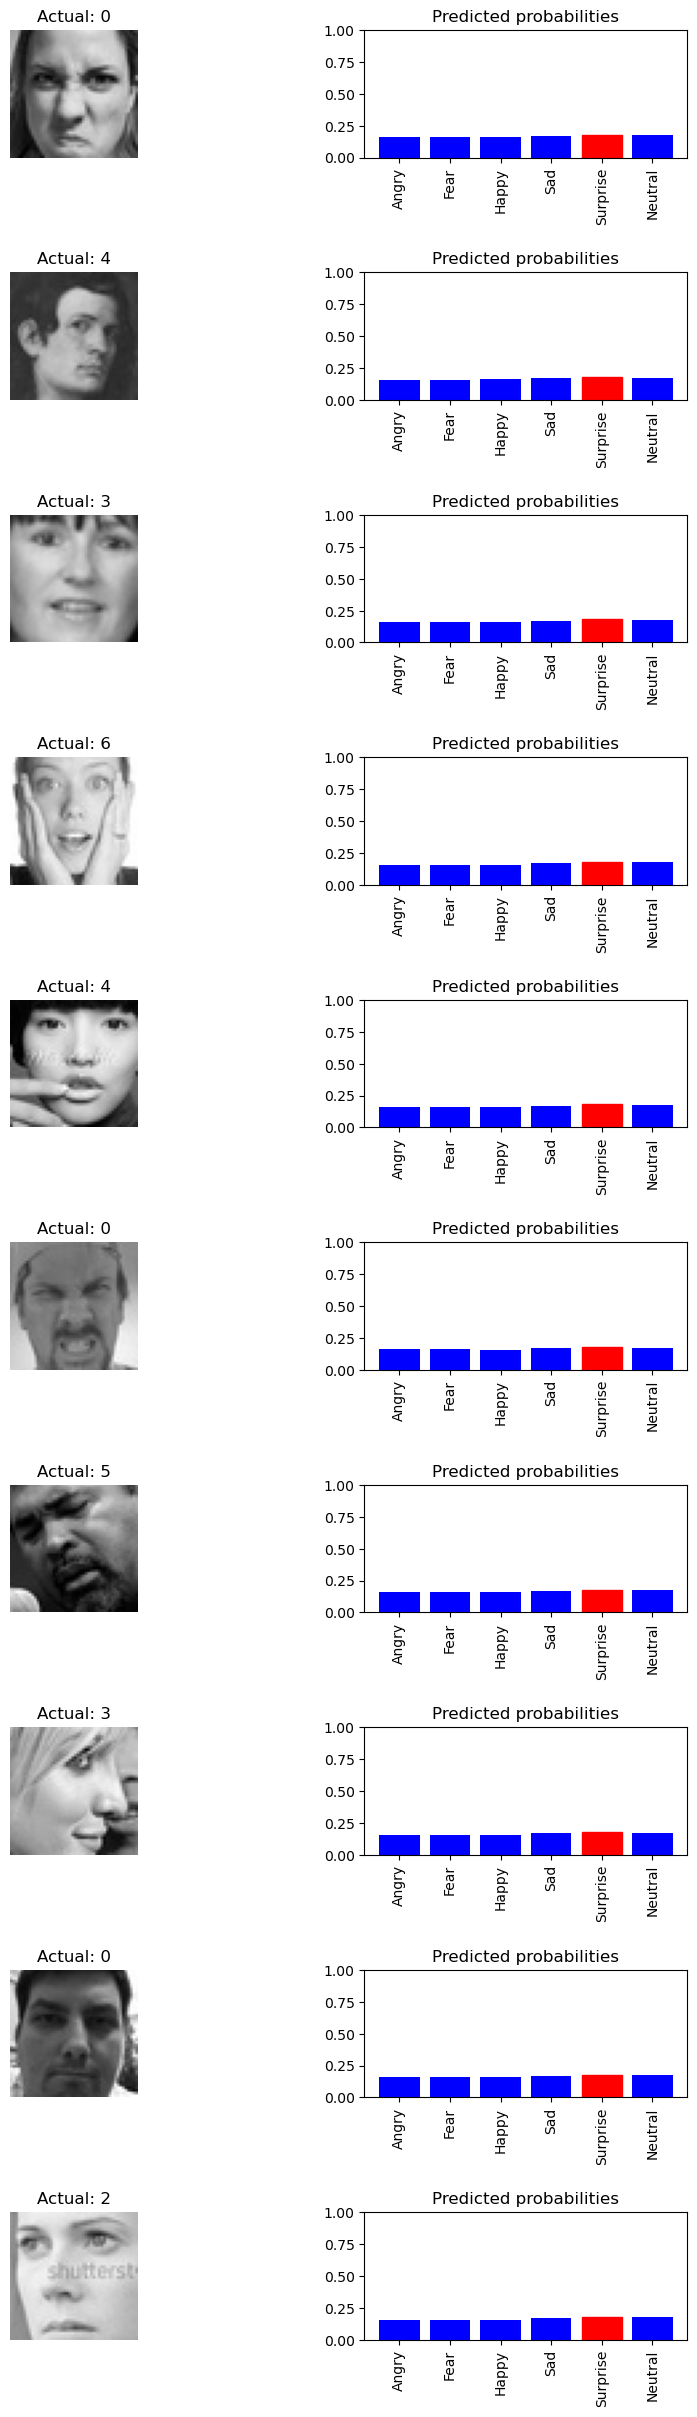

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Load some images from the validation generator
# Note: This generator should not perform any augmentation on the test images
test_images, test_labels = next(validation_generator)

# Get predictions for this batch
predictions = model.predict(test_images)

# Function to plot the results
def plot_image_predictions(images, labels, predictions):
    n = len(images)  # Number of images
    fig, axes = plt.subplots(n, 2, figsize=(10, 3*n))
    fig.subplots_adjust(hspace=0.9, wspace=0.4)

    for i, (img, label, prediction) in enumerate(zip(images, labels, predictions)):
        ax = axes[i, 0]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.title.set_text('Actual: {}'.format(np.argmax(label)))
        ax.axis('off')

        ax = axes[i, 1]
        bars = ax.bar(range(len(prediction)), prediction, color='blue')
        ax.set_xticks(range(len(prediction)))
        ax.set_xticklabels(['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], rotation=90)
        ax.set_title("Predicted probabilities")
        ax.set_ylim([0, 1])
        # Highlight the prediction with the highest probability
        bars[np.argmax(prediction)].set_color('red')

    plt.show()

# Convert grayscale images to RGB for display
test_images_rgb = np.repeat(test_images, 3, axis=-1)

# Plot the image predictions for the first few test images
plot_image_predictions(test_images_rgb[:10], test_labels[:10], predictions[:10])

In [ ]:
# to plot the graph of accuracy and loss
import matplotlib.pyplot as plt
import numpy as np

# summarize history for accuracy
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')